# Getting Libraries 

In [1]:
# Importing Libraries EDA Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for Encoding 
# Label will provide numberical value for categorical feature
# One hot coder will create different columns
# We can use pd.get_dummpy('feature name', drop_frist =True)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Encode = LabelEncoder()

# Libraries for Standardization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Sc = StandardScaler()
Mnmx_Sc= MinMaxScaler()

# linear regression Libraries
# To calculate multicollinearity and VIF 
import statsmodels.api as sm
from scipy import stats

# for model building
# train test split
from  sklearn.model_selection import train_test_split
# Linear model Libraries and Evaluation 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# for polynomial featrues and other regressors

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# EDA: Cleaning, Preprocessing and Feature Engineering 

In [2]:
# importing dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#creating dataframe for the required output

submission = pd.DataFrame()
submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']

In [ ]:
train.head(50)

In [ ]:

train.iloc[1]
#train.describe()
test.iloc[-1]
test.head(10)

In [ ]:
train.isna().sum()
#test.isna().sum()

In [ ]:
test.isna().sum()

We will Fill NA values after Table Transformation.


test['Product_Category_2'].fillna(value=-999,inplace = True)
test['Product_Category_3'].fillna(value=-999,inplace = True)
#test.isna().sum()

In [3]:
Encode = LabelEncoder()
test['Gender'] = Encode.fit_transform(test['Gender'])
test[['City_Category']] = Encode.fit_transform(test[['City_Category']])
train['Gender'] = Encode.fit_transform(train['Gender'])
train[['City_Category']] = Encode.fit_transform(train[['City_Category']])
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].apply(lambda x: 4 if x =='4+' else x)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].apply(lambda x: 4 if x =='4+' else x)
train['Age']=Encode.fit_transform(train['Age'])
test['Age']=Encode.fit_transform(test['Age'])


C:\Users\mgupta1\AppData\Local\Continuum\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


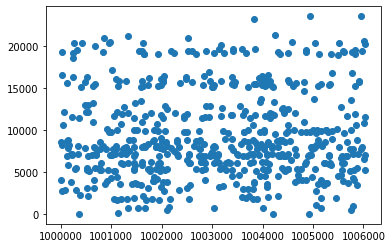

In [4]:
plt.scatter(x= 'User_ID',y='Purchase', data=train.sample(n=600))

In [ ]:
train.head()

In [ ]:
train.describe()
# We still see objects even after converting these categorical features

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



# What columns shall we add to make it more of a good dataset


We would make columns for count of each category, How will it help:
1. how many of the same customers are looking for same thing, age group. We will know for a perticular product ID this many of this age/ marital status/occupation who also have bought this many product category.

2. (mean price/ Min and Max amount spent)what is avg speding of a customer on each category. Mean price according to user_id (what avg amount he spends)| Mean price accoding to product_id (What avg amount is spend on all the categories)| 

3. 25 and 75 percentile price coulumn for each category 

train.groupby(['Age'])['Age'].count()

train.groupby(['Age'])['Age'].transform('count')

In [5]:
train["Age_Count"] = train.groupby(['Age'])['Age'].transform('count')
age_count_dict = train.groupby(['Age']).size().to_dict()
test['Age_Count'] = test['Age'].apply(lambda x:age_count_dict.get(x,0))
# we are using train count in test count

train["Occupation_Count"] = train.groupby(['Occupation'])['Occupation'].transform('count')
occupation_count_dict = train.groupby(['Occupation']).size().to_dict()
test['Occupation_Count'] = test['Occupation'].apply(lambda x:occupation_count_dict.get(x,0))

train["Product_Category_1_Count"] = train.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = train.groupby(['Product_Category_1']).size().to_dict()
test['Product_Category_1_Count'] = test['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

# Product category 2 & 3 has NA values but in count we are calculating actual count so 

train["Product_Category_2_Count"] = train.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = train.groupby(['Product_Category_2']).size().to_dict()
test['Product_Category_2_Count'] = test['Product_Category_2'].apply(lambda x:pc2_count_dict.get(x,0))

train["Product_Category_3_Count"] = train.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = train.groupby(['Product_Category_3']).size().to_dict()
test['Product_Category_3_Count'] = test['Product_Category_3'].apply(lambda x:pc3_count_dict.get(x,0))

train["User_ID_Count"] = train.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = train.groupby(['User_ID']).size().to_dict()
test['User_ID_Count'] = test['User_ID'].apply(lambda x:userID_count_dict.get(x,0))

train["Product_ID_Count"] = train.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = train.groupby(['Product_ID']).size().to_dict()
test['Product_ID_Count'] = test['Product_ID'].apply(lambda x:productID_count_dict.get(x,0))

In [6]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,15102,12930,20213,NaN,NaN,35,227
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,15102,12930,140378,16466.0,18428.0,35,581
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,15102,12930,3947,NaN,NaN,35,102
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,15102,12930,3947,55108.0,NaN,35,341
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969,21504,25371,113925,NaN,NaN,77,203


In [10]:
# min spend by any user:
#train.groupby(['User_ID'])['Purchase'].transform(min)

# Creating Min, Mean and Max columns

In [11]:
train["User_ID_MinPrice"] = train.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = train.groupby(['User_ID'])['Purchase'].min().to_dict()
test['User_ID_MinPrice'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

train["User_ID_MaxPrice"] = train.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = train.groupby(['User_ID'])['Purchase'].max().to_dict()
test['User_ID_MaxPrice'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

train["User_ID_MeanPrice"] = train.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = train.groupby(['User_ID'])['Purchase'].mean().to_dict()
test['User_ID_MeanPrice'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))



train["Product_ID_MinPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = train.groupby(['Product_ID'])['Purchase'].min().to_dict()
test['Product_ID_MinPrice'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

train["Product_ID_MaxPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = train.groupby(['Product_ID'])['Purchase'].max().to_dict()
test['Product_ID_MaxPrice'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

train["Product_ID_MeanPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = train.groupby(['Product_ID'])['Purchase'].mean().to_dict()
test['Product_ID_MeanPrice'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))



train["Product_Cat1_MinPrice"] = train.groupby(['Product_Category_1'])['Purchase'].transform('min')
pc1_min_dict = train.groupby(['Product_Category_1'])['Purchase'].min().to_dict()
test['Product_Cat1_MinPrice'] = test['Product_Category_1'].apply(lambda x:pc1_min_dict.get(x,0))

train["Product_Cat1_MaxPrice"] = train.groupby(['Product_Category_1'])['Purchase'].transform('max')
pc1_max_dict = train.groupby(['Product_Category_1'])['Purchase'].max().to_dict()
test['Product_Cat1_MaxPrice'] = test['Product_Category_1'].apply(lambda x:pc1_max_dict.get(x,0))

train["Product_Cat1_MeanPrice"] = train.groupby(['Product_Category_1'])['Purchase'].transform('mean')
pc1_mean_dict = train.groupby(['Product_Category_1'])['Purchase'].mean().to_dict()
test['Product_Cat1_MeanPrice'] = test['Product_Category_1'].apply(lambda x:pc1_mean_dict.get(x,0))




train["Product_Cat2_MinPrice"] = train.groupby(['Product_Category_2'])['Purchase'].transform('min')
pc2_min_dict = train.groupby(['Product_Category_2'])['Purchase'].min().to_dict()
test['Product_Cat2_MinPrice'] = test['Product_Category_2'].apply(lambda x:pc2_min_dict.get(x,0))

train["Product_Cat2_MaxPrice"] = train.groupby(['Product_Category_2'])['Purchase'].transform('max')
pc2_max_dict = train.groupby(['Product_Category_2'])['Purchase'].max().to_dict()
test['Product_Cat2_MaxPrice'] = test['Product_Category_2'].apply(lambda x:pc2_max_dict.get(x,0))

train["Product_Cat2_MeanPrice"] = train.groupby(['Product_Category_2'])['Purchase'].transform('mean')
pc2_mean_dict = train.groupby(['Product_Category_2'])['Purchase'].mean().to_dict()
test['Product_Cat2_MeanPrice'] = test['Product_Category_2'].apply(lambda x:pc2_mean_dict.get(x,0))




train["Product_Cat3_MinPrice"] = train.groupby(['Product_Category_3'])['Purchase'].transform('min')
pc3_min_dict = train.groupby(['Product_Category_3'])['Purchase'].min().to_dict()
test['Product_Cat3_MinPrice'] = test['Product_Category_3'].apply(lambda x:pc3_min_dict.get(x,0))

train["Product_Cat3_MaxPrice"] = train.groupby(['Product_Category_3'])['Purchase'].transform('max')
pc3_max_dict = train.groupby(['Product_Category_3'])['Purchase'].max().to_dict()
test['Product_Cat3_MaxPrice'] = test['Product_Category_3'].apply(lambda x:pc3_max_dict.get(x,0))

train["Product_Cat3_MeanPrice"] = train.groupby(['Product_Category_3'])['Purchase'].transform('mean')
pc3_mean_dict = train.groupby(['Product_Category_3'])['Purchase'].mean().to_dict()
test['Product_Cat3_MeanPrice'] = test['Product_Category_3'].apply(lambda x:pc3_mean_dict.get(x,0))


# creating 25th and 75th percentile columns on Purchase

In [ ]:
userID_25p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['User_ID_25PerPrice'] = train['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
test['User_ID_25PerPrice'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_75p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['User_ID_75PercPrice'] = train['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
test['User_ID_75PercPrice'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))


productID_25p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_ID_25PercPrice'] = train['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
test['Product_ID_25PercPrice'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_75p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_ID_75PercPrice'] = train['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
test['Product_ID_75PercPrice'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))



pc1_25p_dict = train.groupby(['Product_Category_1'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_Cat1_25PercPrice'] = train['Product_Category_1'].apply(lambda x:pc1_25p_dict.get(x,0))
test['Product_Cat1_25PercPrice'] = test['Product_Category_1'].apply(lambda x:pc1_25p_dict.get(x,0))

pc1_75p_dict = train.groupby(['Product_Category_1'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_Cat1_75PercPrice'] = train['Product_Category_1'].apply(lambda x:pc1_75p_dict.get(x,0))
test['Product_Cat1_75PercPrice'] = test['Product_Category_1'].apply(lambda x:pc1_75p_dict.get(x,0))



pc2_25p_dict = train.groupby(['Product_Category_2'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_Cat2_25PercPrice'] = train['Product_Category_2'].apply(lambda x:pc2_25p_dict.get(x,0))
test['Product_Cat2_25PercPrice'] = test['Product_Category_2'].apply(lambda x:pc2_25p_dict.get(x,0))

pc2_75p_dict = train.groupby(['Product_Category_2'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_Cat2_75PercPrice'] = train['Product_Category_2'].apply(lambda x:pc2_75p_dict.get(x,0))
test['Product_Cat2_75PercPrice'] = test['Product_Category_2'].apply(lambda x:pc2_75p_dict.get(x,0))




pc3_25p_dict = train.groupby(['Product_Category_3'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_Cat3_25PercPrice'] = train['Product_Category_3'].apply(lambda x:pc3_25p_dict.get(x,0))
test['Product_Cat3_25PercPrice'] = test['Product_Category_3'].apply(lambda x:pc3_25p_dict.get(x,0))

pc3_75p_dict = train.groupby(['Product_Category_3'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_Cat3_75PercPrice'] = train['Product_Category_3'].apply(lambda x:pc3_75p_dict.get(x,0))
test['Product_Cat3_75PercPrice'] = test['Product_Category_3'].apply(lambda x:pc3_75p_dict.get(x,0))

In [ ]:
train['Product_Category_2'].fillna(value='99',inplace = True)
train['Product_Category_3'].fillna(value='99',inplace = True)
test['Product_Category_2'].fillna(value='99',inplace = True)
test['Product_Category_3'].fillna(value='99',inplace = True)
train.isna().sum()

In [ ]:
train.drop('User_ID',axis=1,inplace=True)
test.drop('User_ID',axis=1,inplace=True)
train.drop('Product_ID',axis=1,inplace=True)
test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
train.info()

In [ ]:
# Box plot Analysis is performed to remove outliers

sns.boxplot(train['Purchase'])

q1 = train['Purchase'].quantile(0.25)
q3 = train['Purchase'].quantile(0.75)
iqr = q3-q1 #Interquartile range


In [ ]:
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

In [ ]:
train = train[(train['Purchase'] > fence_low) & (train['Purchase'] < fence_high)]

In [ ]:
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

In [ ]:
train.info()

In [ ]:
feat_names = [i for i in train.columns]
feat_names

In [ ]:
# We need to change the variable type for categorical features it is important
#chanding data type of categorical variable to string so as to one hot encode them using get_dummies
for s in feat_names:
    train[s] = x[s].astype(str)
    test[s] = test[s].astype(str)

In [ ]:
#fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(train.corr(),annot=True)

In [ ]:
# Train data is separated into dependent and Independent Variable
X = train.drop('Purchase',axis=1)
Y = train['Purchase']   

In [ ]:
#X = pd.DataFrame(X,columns=feat_names)
#X.head()

In [ ]:
#feat_names

# To calculate VIF

# Modeling

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state =101)


In [ ]:
x_train.isna().sum()

In [ ]:
# poly_reg = PolynomialFeatures(degree = 4)
# poly_reg.fit(x_train,y_train)
# X_poly = poly_reg.fit_transform(x_train)

In [ ]:
# lasso linear regressor
lin_reg_lasso = linear_model.LassoLars(alpha=0.03,max_iter=101)
# Linear Regressor
lin_reg = LinearRegression()

In [ ]:
# Linear model with linear features
lin_reg.fit(x_train, y_train)

linpred = lin_reg.predict(x_test)

print(r2_score(y_test, linpred))

In [ ]:
# Linear Lasso model with linear feature
lin_reg_lasso.fit(x_train, y_train)

linpredlaso = lin_reg_lasso.predict(x_test)

print(r2_score(y_test, linpredlaso))

In [ ]:
# Poly model with linear
#Reg=lin_reg.fit(poly_reg.fit_transform(x_train), y_train)

#polypred = lin_reg.predict(poly_reg.fit_transform(x_test))

#print(r2_score(y_test, polypred))

In [ ]:
# Poly model with Lasso
#Reg2=lin_reg_lasso.fit(poly_reg.fit_transform(x_train), y_train)

#polypred_laso = lin_reg_lasso.predict(poly_reg.fit_transform(x_test))

#print(r2_score(y_test, polypred_laso))